Imports

In [1]:
from binopi import opifit, opiparams, noisymodel, opiutils, opiplot
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy.special import j0

Import data

In [2]:
exdatapath = '/Users/amblardb/Documents/PhD/Code/Modules/binopi_pkg/refobs/'
exdata = opiutils.importOIFits(exdatapath)

Useful constants

In [3]:
mas = constants.arcsecond/1000
refwave = 2.15e-6   
scale = 'freq'

Define model

In [4]:
datamodel = opiparams.mergeModel(opiparams.ModulatedRing(1), opiparams.PointSource(1))

datamodel.params['vis_modulated_ring;1:FLUX'] = 0.95
datamodel.params['vis_modulated_ring;1:RINGRADIUS'] = 3*mas
datamodel.params['vis_modulated_ring;1:RADIUS'] = 1*mas
datamodel.params['vis_modulated_ring;1:ERATIO'] = 1.3
datamodel.params['vis_modulated_ring;1:POSANG'] = 140*constants.pi/180
datamodel.params['vis_modulated_ring;1:SPI'] = opiutils.teff_to_spi(1500, refwave)

datamodel.params['vis_point_source;1:FLUX'] = 0.05
datamodel.params['vis_modulated_ring;1:SPI'] = opiutils.teff_to_spi(10000, refwave)

print(datamodel.params)

{'vis_modulated_ring;1:POSANG': 2.443460952792061, 'vis_modulated_ring;1:FLUX': 0.95, 'vis_modulated_ring;1:OFX': 0, 'vis_modulated_ring;1:OFY': 0, 'vis_modulated_ring;1:RADIUS': 4.84813681109536e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4544410433286082e-08, 'vis_modulated_ring;1:ERATIO': 1.3, 'vis_modulated_ring;1:FLOR': 1, 'vis_modulated_ring;1:MOD': 1, 'vis_modulated_ring;1:CM': [0], 'vis_modulated_ring;1:SM': [0], 'vis_modulated_ring;1:SPI': 1.6283574376766428, 'vis_point_source;1:FLUX': 0.05, 'vis_point_source;1:OFX': 0, 'vis_point_source;1:OFY': 0, 'vis_point_source;1:SPI': 1.6283574376766428}


Generate data

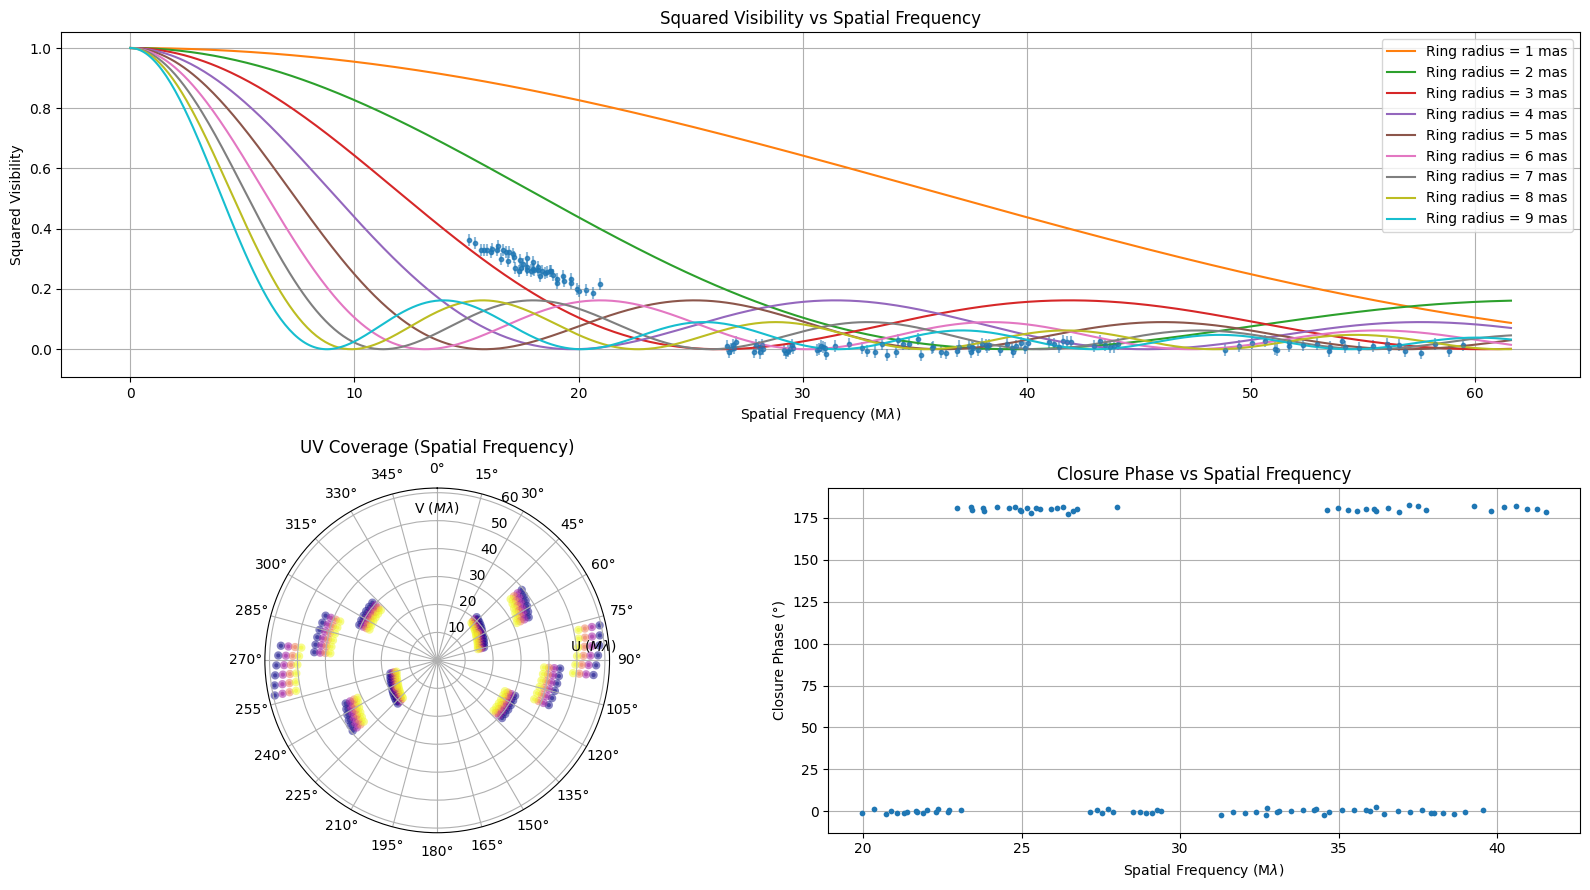

In [5]:
noisydata = noisymodel.noisymodel(datamodel, exdata, noiselevel = 1e-2)

opiplot.abaqPlot(noisydata)

In [6]:
model = opiparams.mergeModel(opiparams.ModulatedRing(1), opiparams.PointSource(1))

#model.params['']

model.free['vis_modulated_ring;1:FLUX'] = True
model.free['vis_modulated_ring;1:POSANG'] = True
model.free['vis_modulated_ring;1:RINGRADIUS'] = True
model.free['vis_modulated_ring;1:RADIUS'] = True
model.free['vis_modulated_ring;1:ERATIO'] = True


Least squares fit

LS done
{'vis_modulated_ring;1:POSANG': 2.459910558308326, 'vis_modulated_ring;1:FLUX': 0.8859386484127274, 'vis_modulated_ring;1:OFX': 0, 'vis_modulated_ring;1:OFY': 0, 'vis_modulated_ring;1:RADIUS': 3.4880868467232736e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.7172580257240547e-08, 'vis_modulated_ring;1:ERATIO': 1.3616772565367516, 'vis_modulated_ring;1:FLOR': 1, 'vis_modulated_ring;1:MOD': 1, 'vis_modulated_ring;1:CM': [0], 'vis_modulated_ring;1:SM': [0], 'vis_modulated_ring;1:SPI': -1.5134406613602813, 'vis_point_source;1:FLUX': 0.05794158256444293, 'vis_point_source;1:OFX': 0, 'vis_point_source;1:OFY': 0, 'vis_point_source;1:SPI': 1.6283574376766428}
{'vis_modulated_ring;1:POSANG': 2.459910558308326, 'vis_modulated_ring;1:FLUX': 0.8859386484127274, 'vis_modulated_ring;1:OFX': 0, 'vis_modulated_ring;1:OFY': 0, 'vis_modulated_ring;1:RADIUS': 3.4880868467232736e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.7172580257240547e-08, 'vis_modulated_ring;1:ERATIO': 1.3616772565367516, 'vis_modul

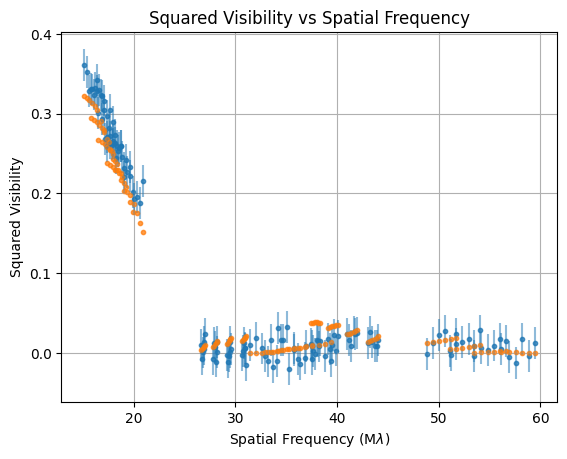

In [7]:
lsmodel, redchisquared = opifit.master_leastSquares(model, noisydata, 100)
print(model.params)
print(lsmodel.params)
lsdata = noisymodel.noisymodel(lsmodel, exdata, noiselevel = 0)

figls = plt.figure()
axls = plt.subplot(1,1,1)
opiplot.plot_vis2(noisydata, axls, type = 'errorbars', scale = scale)
opiplot.plot_vis2(lsdata, axls, type = 'errorbars', scale = scale)
plt.show()


MCMC fit

In [8]:
sampler, mcmc_result, mcmodel, keys = opifit.fit_mcmc(1000, 100, model, noisydata)

vis_modulated_ring;1:POSANG
vis_modulated_ring;1:FLUX
vis_modulated_ring;1:RADIUS
vis_modulated_ring;1:RINGRADIUS
vis_modulated_ring;1:ERATIO


100%|██████████| 1000/1000 [01:06<00:00, 15.13it/s]


Generate fit report

2.436241661658885 0
0.9456231638706558 -1
4.72942840376343e-09 -9
1.4227749804322225e-08 -8
1.2694439444097516 0


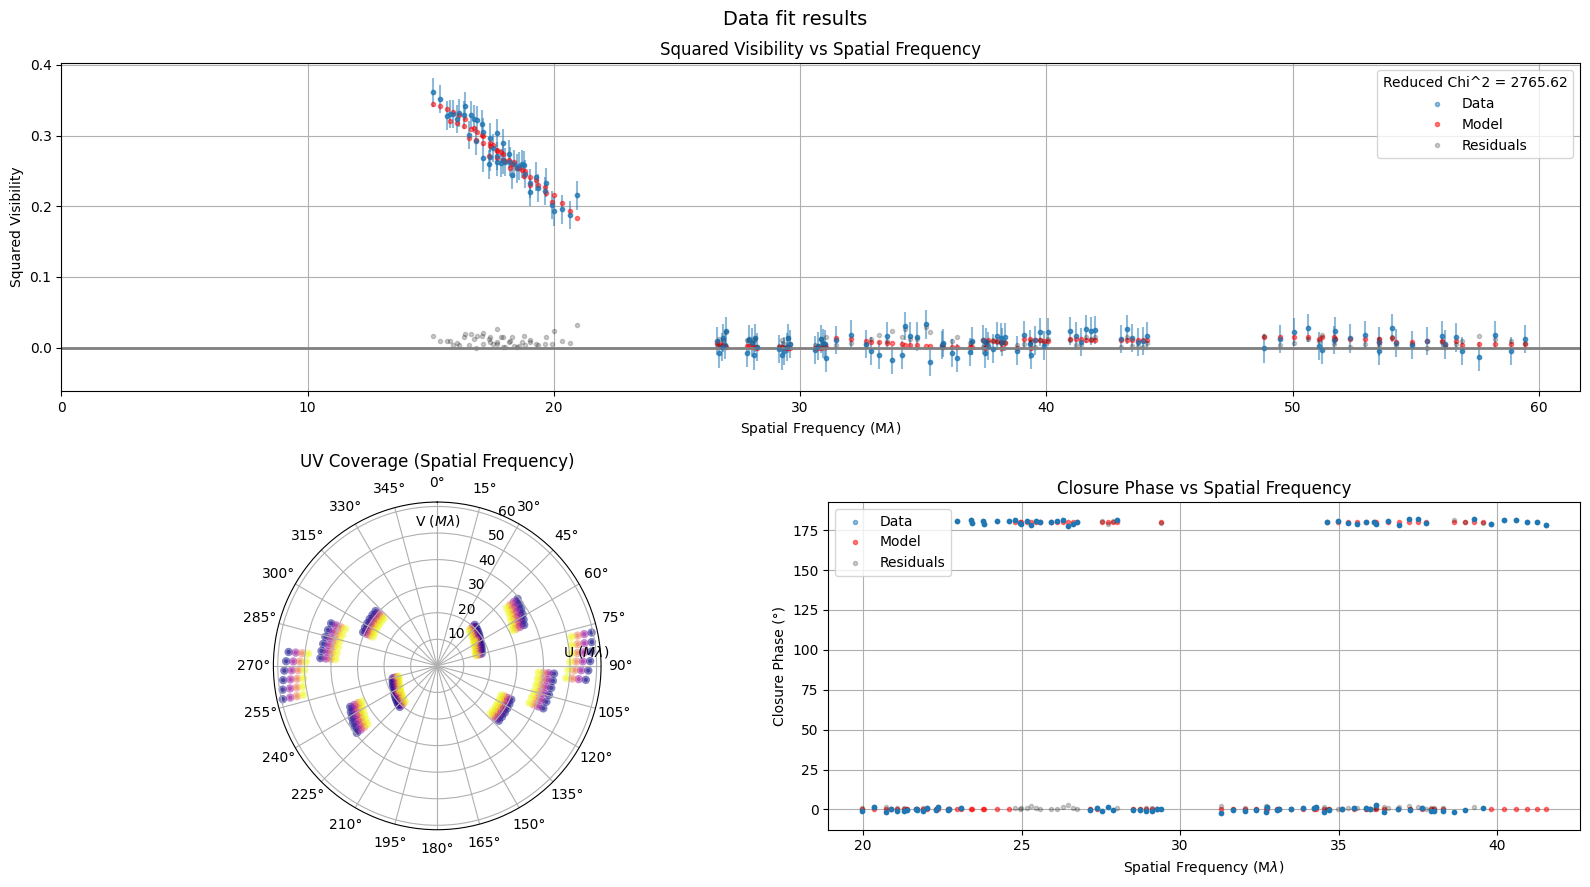

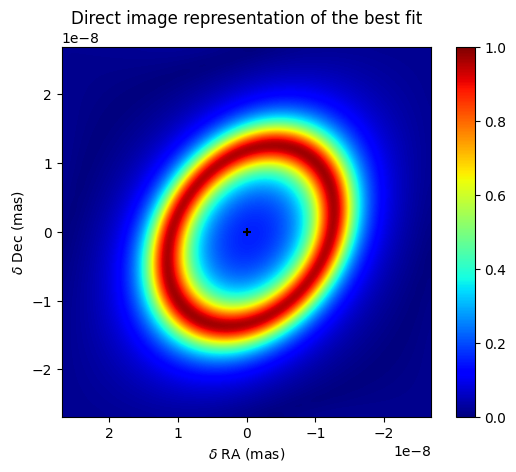

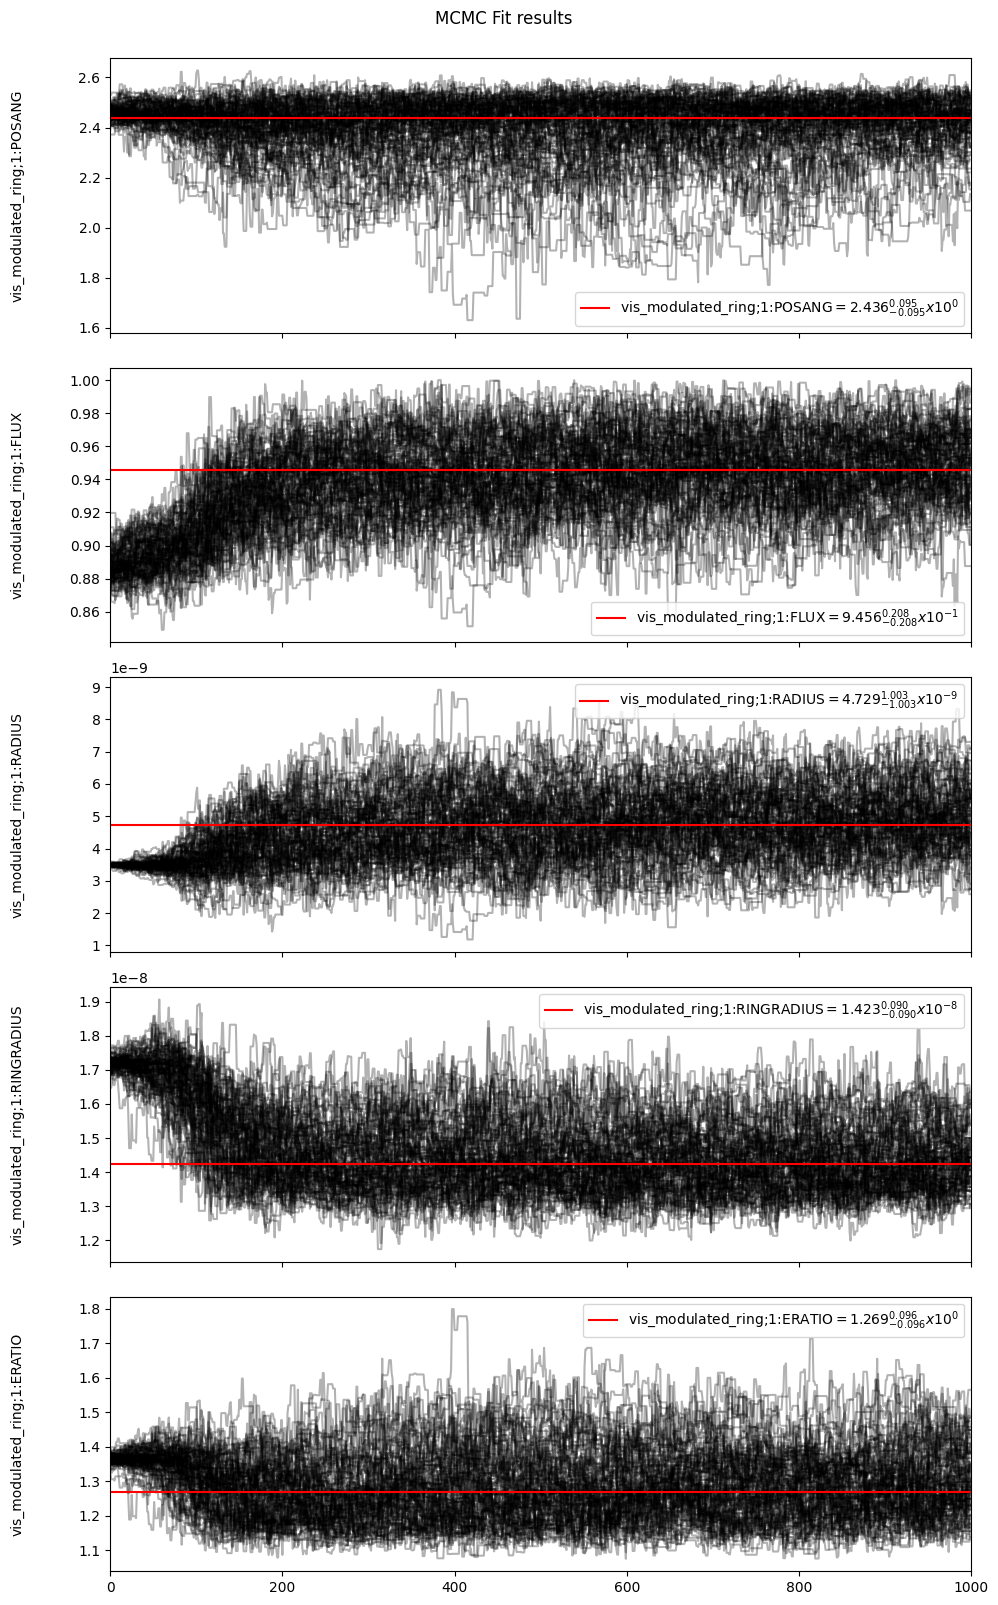

In [9]:
opiplot.fitReport('.', noisydata, sampler, mcmodel, keys)

In [10]:
print('DATA',datamodel.params)
print('MODEL',model.params)
print(model.params['vis_modulated_ring;1:FLUX']+model.params['vis_point_source;1:FLUX'])

DATA {'vis_modulated_ring;1:POSANG': 2.443460952792061, 'vis_modulated_ring;1:FLUX': 0.95, 'vis_modulated_ring;1:OFX': 0, 'vis_modulated_ring;1:OFY': 0, 'vis_modulated_ring;1:RADIUS': 4.84813681109536e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4544410433286082e-08, 'vis_modulated_ring;1:ERATIO': 1.3, 'vis_modulated_ring;1:FLOR': 1, 'vis_modulated_ring;1:MOD': 1, 'vis_modulated_ring;1:CM': [0], 'vis_modulated_ring;1:SM': [0], 'vis_modulated_ring;1:SPI': 1.6283574376766428, 'vis_point_source;1:FLUX': 0.05, 'vis_point_source;1:OFX': 0, 'vis_point_source;1:OFY': 0, 'vis_point_source;1:SPI': 1.6283574376766428}
MODEL {'vis_modulated_ring;1:POSANG': 2.500824392406272, 'vis_modulated_ring;1:FLUX': 0.9573460874367644, 'vis_modulated_ring;1:OFX': 0, 'vis_modulated_ring;1:OFY': 0, 'vis_modulated_ring;1:RADIUS': 5.855211273519318e-09, 'vis_modulated_ring;1:RINGRADIUS': 1.4251564047228588e-08, 'vis_modulated_ring;1:ERATIO': 1.3358352822793966, 'vis_modulated_ring;1:FLOR': 1, 'vis_modulated_ring;1:M

In [11]:
1.4544410433286082e-08/mas

3.0

In [12]:
1.1837184836581343e-08/mas

2.4415946368285173